Name: Tasfia Tasneem Annesha

Id: 190041220


#Task 1:
Implement the morphological Dilation and Erosion on Binary images.
Show the effects of repeated applications of both Dilation and Erosion.
Note: You cannot use built-in libraries.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import skimage.color
import skimage.filters
from scipy import signal
import random

In [2]:
def display_bin(image):
    plt.imshow(image, cmap=plt.cm.gray)
    plt.show()

In [3]:
def display_gray(image):
    rgb_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    plt.imshow(image, cmap=plt.cm.gray)
    plt.show()

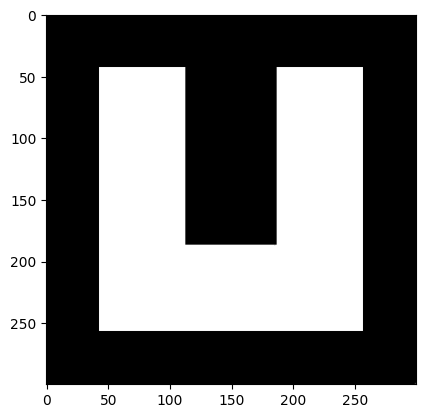

In [5]:
image = cv2.imread('FigP0905(U).tif') # BGR Image
image = cv2.resize(image, (300, 300))
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
display_bin(image)

#Dilation

In [6]:
def dilate(image, k):
    h, w = image.shape
    out = np.zeros((h,w))
    step = k//2

    for i in range(h):
        for j in range(w):
            for x in range(i-step, i+step+1):
                for y in range(j-step, j+step+1):
                    if not (x<0 or x>=h or y<0 or y>=w):
                        out[i][j] = max(out[i][j], image[x][y])

    return out

#difference after dilation

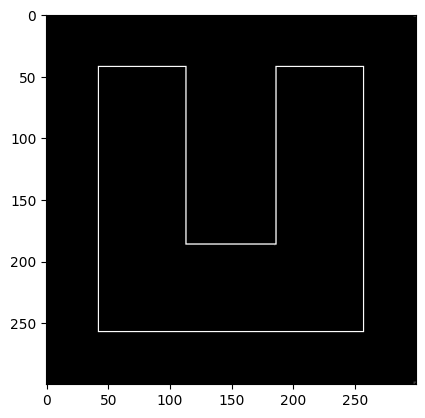

In [7]:
dil_out = dilate(image, 3)
diff = dil_out - image
display_bin(diff)

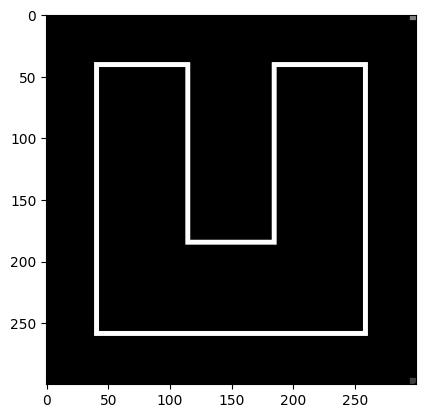

In [ ]:
dil_out1 = dilate(image, 3)
dil_out2 = dilate(dil_out1, 3)
dil_out3 = dilate(dil_out2, 3)
dil_out4 = dilate(dil_out3, 3)
diff = dil_out4 - image
display_bin(diff)

We can observe that the original becomes increasingly thicker as a result of continuous dilation. As a result, the difference between two images thickens more than the difference caused by a single dilation.

#Erosion

In [8]:
def erode(image, k):
    h, w = image.shape
    out = np.ones((h,w)) * 255
    step = k//2

    for i in range(h):
        for j in range(w):
            for x in range(i-step, i+step+1):
                for y in range(j-step, j+step+1):
                    if not (x<0 or x>=h or y<0 or y>=w):
                        out[i][j] = min(out[i][j], image[x][y])

    return out

#Difference after erosion

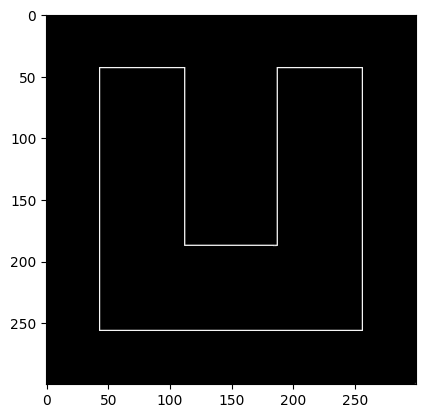

In [9]:
erode_out = erode(image, 3)
diff = image - erode_out
display_bin(diff)

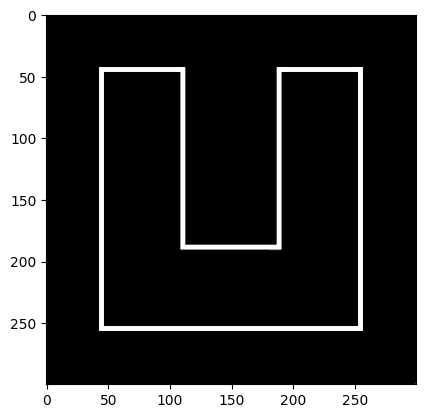

In [ ]:
erode_out1 = erode(image, 3)
erode_out2 = erode(erode_out1, 3)
erode_out3 = erode(erode_out2, 3)
erode_out4 = erode(erode_out3, 3)
diff = image - erode_out4
display_bin(diff)

We can observe that the original image gets smaller as a result of continuous erosion. As a result, as we can see above, when we subtract the eroded image from the original image, the boundary becomes thicker. Since erosion reduces the original shape, the boundaries created by erosion are smaller in scale than those created by dilation.

#Task 2:
Granulometry is a field that deals with determining the size distribution of particles in an image. Determine the sizes of granules in Fig. 9.41(a) which is an image of wood dowel plugs of two dominant sizes.
Apply smoothing on the given image before you apply the Opening operations with circular SEs of variables sizes.

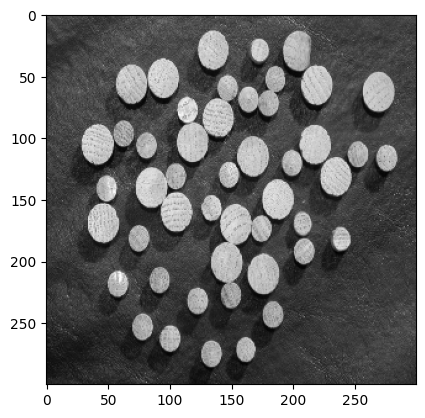

In [11]:
image = cv2.imread('Fig0941(a)(wood_dowels).tif')
image = cv2.resize(image, (300, 300))
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
display_bin(image)

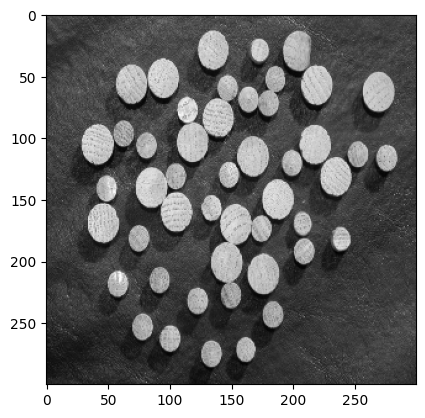

In [12]:
kernel = np.ones((5,5), np.float32)/(5*5)
image_smooth = cv2.filter2D(image, -1, kernel)
display_bin(image)

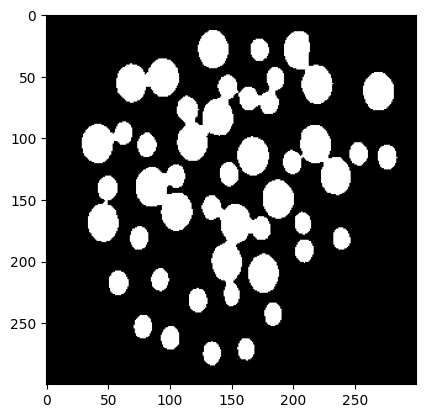

In [13]:
_, image_thresh = cv2.threshold(image_smooth, 130, 255, cv2.THRESH_BINARY)
display_bin(image_thresh)

In [14]:
values = []
for i in range(1, 31):
    se = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (i,i))
    out = cv2.morphologyEx(image_thresh, cv2.MORPH_OPEN, se, iterations=1)
    values.append(np.mean(out))

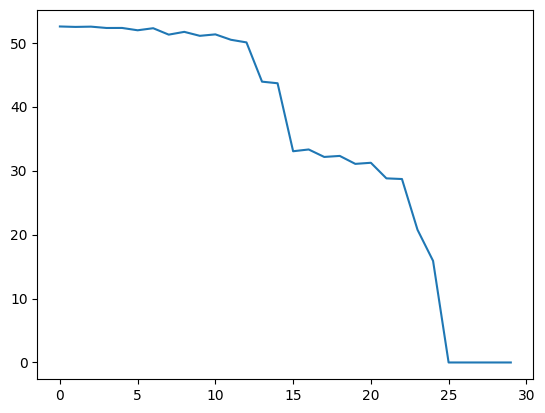

In [15]:
plt.plot(values)

The graph clearly shows a decline in mean intensity between 15 and 25. Thus, these are the sizes of the image's circular structures.

#Task 3
Texture segmentation

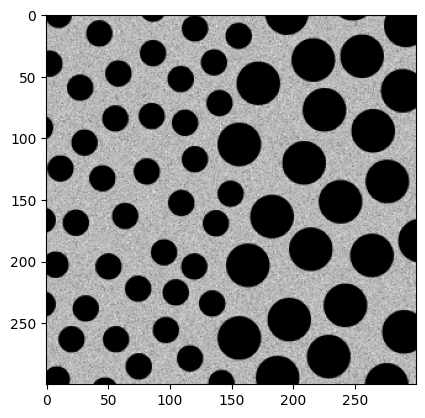

In [16]:
image = cv2.imread('/content/Fig0943(a)(dark_blobs_on_light_background).tif')
image = cv2.resize(image, (300, 300))
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
display_bin(image)

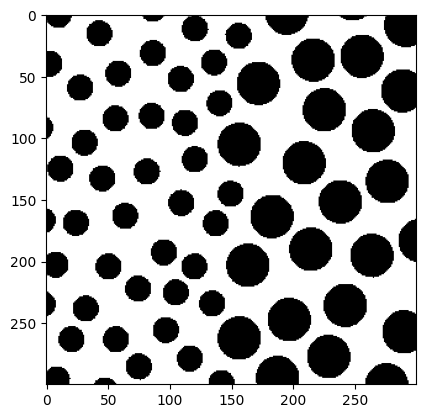

In [17]:
_, image_thresh = cv2.threshold(image, 130, 255, cv2.THRESH_BINARY)
display_bin(image_thresh)

In [18]:
values = []
for i in range(1, 31):
    se = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (i,i))
    out = cv2.morphologyEx(image_thresh, cv2.MORPH_OPEN, se, iterations=1)
    values.append(np.mean(out))

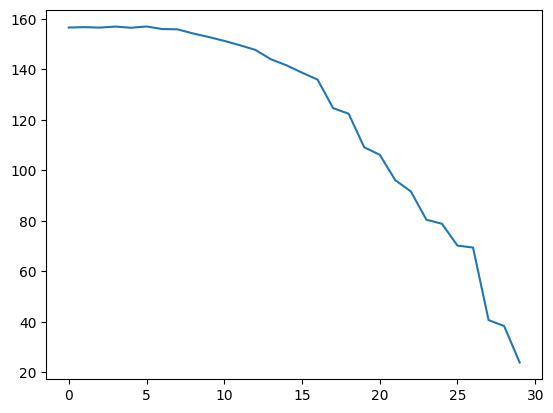

In [19]:
plt.plot(values)

#Removing all small ones

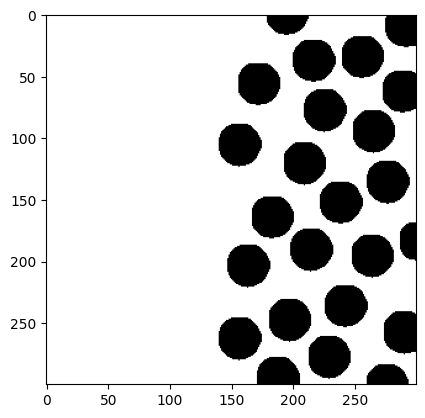

In [20]:
se = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (24,24))
out_close = cv2.morphologyEx(image_thresh, cv2.MORPH_CLOSE, se, iterations=1)
display_bin(out_close)

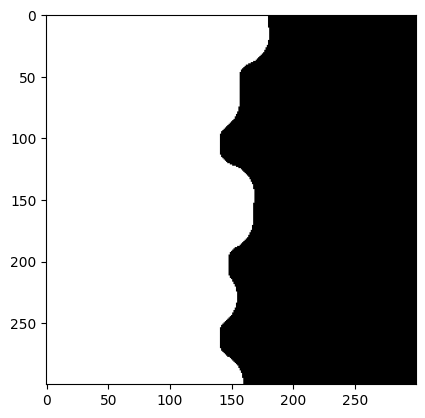

In [21]:
se = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (50,50))
out_open = cv2.morphologyEx(out_close, cv2.MORPH_OPEN, se, iterations=1)
display_bin(out_open)

#boundary extraction

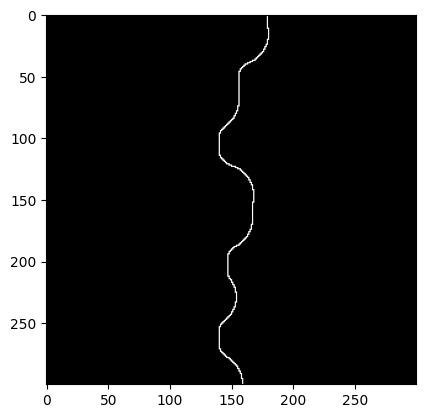

In [22]:
erode_out = erode(out_open, 3)
diff = out_open - erode_out
display_bin(diff)

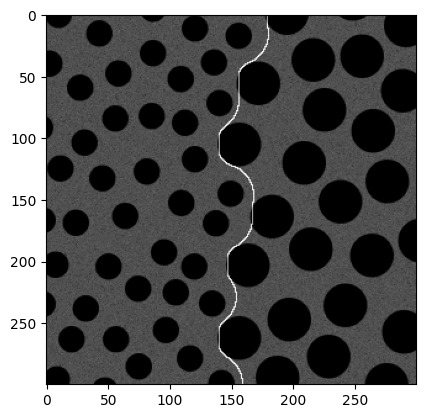

In [23]:
image_superimposed= image + diff
display_bin(image_superimposed)

#Task 4:
A preprocessing step in an application of microscopy is concerned with the issue of isolating individual round particles from similar particles that overlap in
groups of two or more particles (see following image). Assuming that all particles are of the same size, propose a morphological algorithm that produces three
images consisting respectively of

(a) Only of particles that have merged with the boundary of the image.

(b) Only overlapping particles.

(c) Only nonoverlapping particles.

#a. Only of particles that have merged with the boundary of the image.

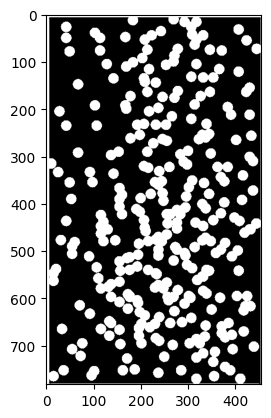

In [24]:
image = cv2.imread('/content/FigP0936(bubbles_on_black_background).tif')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
display_bin(image)

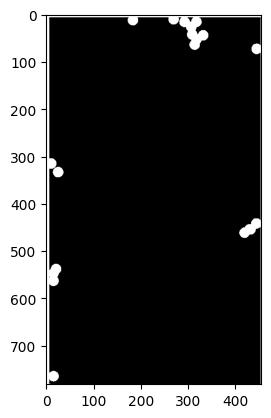

In [25]:
ret, labels = cv2.connectedComponents(image)
image_boundary_merged = np.zeros((image.shape))
image_boundary_merged[labels == 1] = 255
display_bin(image_boundary_merged)

It is evident that the boundary bears the same color the particles. Consequently, we only extract the connected components that have a boundary after running a connected component algorithm. The IDs of each connected component are returned in this case by the cv2.connectedComponents() function. In this instance, the boundary connected components' ID was 1. That allowed the particles that had combined with the boundary to be separated.

#c.Only non-overlapping particles.

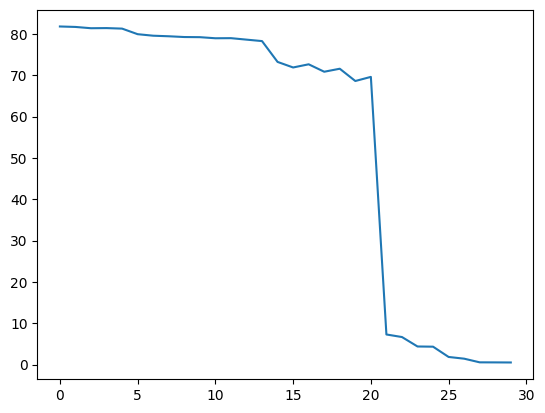

In [26]:
values = []
for i in range(1, 31):
    se = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (i,i))
    out = cv2.morphologyEx(image, cv2.MORPH_OPEN, se, iterations=1)
    values.append(np.mean(out))
plt.plot(values)

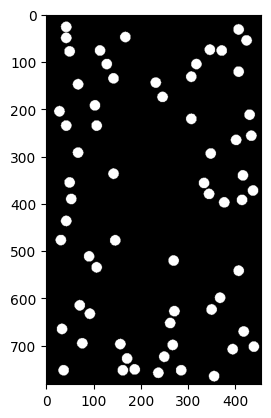

In [27]:
totalLabels, label_ids, values, centroid = cv2.connectedComponentsWithStats(image)
image_nonoverlap = np.zeros(image.shape, dtype="uint8")

for i in range(1, totalLabels):
    area = values[i, cv2.CC_STAT_AREA]
    if area <= 400: # This value was played around with and found that an area of 20x20=400 gives us the isolated circles
        componentMask = (label_ids == i).astype("uint8") * 255
        image_nonoverlap = cv2.bitwise_or(image_nonoverlap, componentMask)

display_bin(image_nonoverlap)

Here, we apply the connected component method once more to identify the circles whose areas are less than or equal to those of each isolated circle in the picture. Since the area of the overlapping circles will be larger than that of the isolated circles, this provides us with all of the non-overlapping circles.

#b.Only overlapping particles.

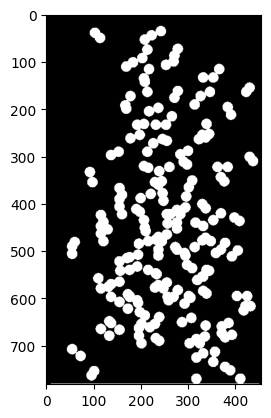

In [29]:
image_overlapping = image - image_boundary_merged - image_nonoverlap
display_bin(image_overlapping)

It is simple to identify the overlapping circles by taking out the non-overlapping and boundary circles from the original image.